## The Elegant, the Poor and the Ugly  

## `if` statement

Julia's `if` statement works just like in Python, with a few differences:

* Julia uses `elseif` instead of Python's `elif`.
* Julia's logic operators are just like in C-like languages: `&&` means `and`, `||` means `or`, `!` means `not`, and so on.

In [19]:
theme(:juno)

In [ ]:
π

In [ ]:
ℯ

In [ ]:
x = ℯ
if x == π
    println(π)
elseif x == ℯ
    println(ℯ)
else
    println("neither $ℯ not $π")
end

Julia also has `⊻` for exclusive or (you can type `\xor<tab>` to get the ⊻ character):

In [ ]:
x = ℯ
y = π
⊻(x == π, y == π)

Since `&&` is lazy (like `and` in Python), `cond && f()` is a common shorthand for `if cond; f(); end`. Think of it as "_cond then f()_":

In [ ]:
x = π
x == π && println(π)
# x == ℯ && println(ℯ)

Similarly, `cond || f()` is a common shorthand for `if !cond; f(); end`. Think of it as "_cond else f()_":

In [ ]:
x = ℯ
x == π || println("Not $π")
# x == ℯ || println("Not $ℯ")

All expressions return a value in Julia, including `if` statements. For example:

When an expression cannot return anything, it returns `nothing`:

In [ ]:
x = π
result = if x == ℯ
            "ℯ"
          end

isnothing(result)

`nothing` is the single instance of the type `Nothing`:

In [ ]:
typeof(nothing)

In [ ]:
typeof(1.0)

## `for` loops
You can use `for` loops just like in Python, as we saw earlier. However, it's also possible to create nested loops on a single line:

In [12]:
for a ∈ 1:2, b ∈ 1:3, c ∈ 1:2
    println((a, b, c))
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)
(2, 3, 1)
(2, 3, 2)


The corresponding Python code would look like this:

```python
# PYTHON
from itertools import product

for a, b, c in product(range(1, 3), range(1, 4), range(1, 3)):
    print((a, b, c))
```

The `continue` and `break` keywords work just like in Python. Note that in single-line nested loops, `break` will exit all loops, not just the inner loop:

In [13]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
    (a, b, c) == (2, 1, 1) && break
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)


Julia does not support the equivalent of Python's `for`/`else` construct. You need to write something like this:

In [ ]:
found = false
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"] # try removing "Wally"
    println("Looking at $person")
    person == "Wally" && (found = true; break)
end
found || println("I did not find Wally.")

The equivalent Python code looks like this:

```python
# PYTHON
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"]: # try removing "Wally"
    print(f"Looking at {person}")
    if person == "Wally":
        break
else:
    print("I did not find Wally.")
```



|Julia|Python
|-----|------
|`if cond1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elseif cond2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`end` |`if cond1:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elif cond2:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`&&` | `and`
|`\|\|` | `or`
|`!` | `not`
|`⊻` (type `\xor<tab>`) | `^`
|`true` | `True`
|`false` | `False`
|`cond && f()` | `if cond: f()`
|`cond \|\| f()` | `if not cond: f()`
|`for i in 1:5 ... end` | `for i in range(1, 6): ...`
|`for i in 1:5, j in 1:6 ... end` | `from itertools import product`<br />`for i, j in product(range(1, 6), range(1, 7)):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`while cond ... end` | `while cond: ...`
|`continue` | `continue`
|`break` | `break`


## Coding Styles

In what follows, we show an example where the function `randn` is used to create samples from a standard normal ditribution. For this, we use `for` loop in various styles.

In [14]:
# ugly style
n = 100
ϵ = zeros(n) 
for i in 1:n
    ϵ[i] = randn()
end

The for loop's `in` keyword can be replaced with either `∈` or `=`. Although the index variable is cycled over for all integers between 1 and n, this does not result in the creation of a vector of those indices. Rather than that, it produces an _iterator_ that is looped through — in this case, the integer range 1 to n. The following code provides a better connection between index `i` and the variable `ϵ`.

In [15]:
# poor (but handsome) style
n = 100
ϵ = zeros(n)
for i ∈ eachindex(ϵ)
    ϵ[i] = randn()
end

In [ ]:
ϵ_sum = 0.0
for j ∈ eachindex(ϵ)
    ϵ_sum += ϵ[j]
end
μ = ϵ_sum / n

0.005595808502948318

We can write the generative part of the code in a user defined function:

In [ ]:
using Plots

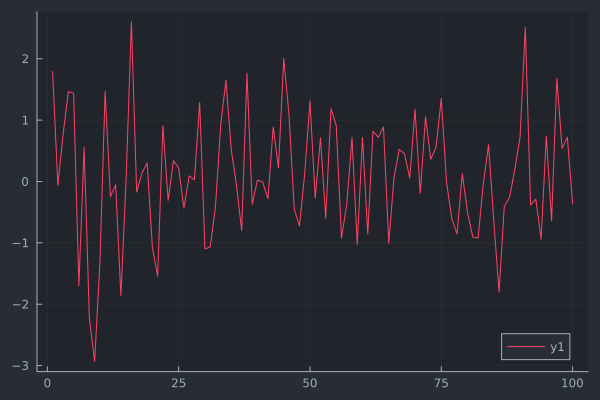

In [20]:
# ugly style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = randn()
    end
    return ϵ
end

data = generatedata(100)
plot(data)


$$Var(\epsilon) = E(\epsilon^2) - (E(\epsilon))^2$$

$$E(\epsilon^3)$$

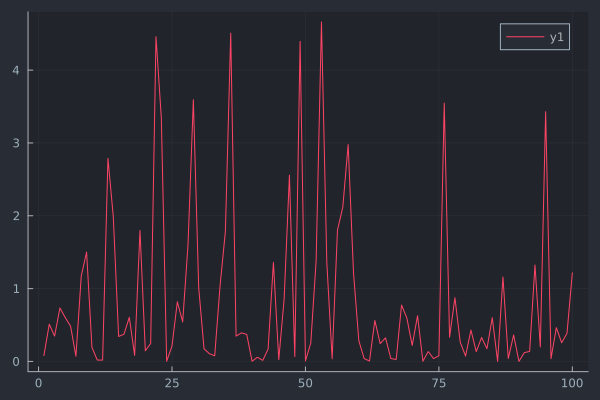

In [21]:
function generatedata_sq(n)
    ϵ = randn(n)
    for i ∈ eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end

data = generatedata_sq(100)
plot(data)

In [22]:
generate_data2(n) = randn(n).^2

generate_data2 (generic function with 1 method)

An elagant abstract approach offers a generatedata function able to generically apply to any given function.

In [23]:
using Pkg
Pkg.add("StatsFuns")

   Resolving package versions...
  No Changes to `C:\Users\Hamid\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hamid\.julia\environments\v1.10\Manifest.toml`


In [24]:
using StatsFuns

In [26]:
generatedata(n, f) = f.(randn(n)) #function broadcasting

f(x) = StatsFuns.logistic(x) # simple Sigmoid function
# f(x) = sin(x)
data = generatedata(100, f); # applies f

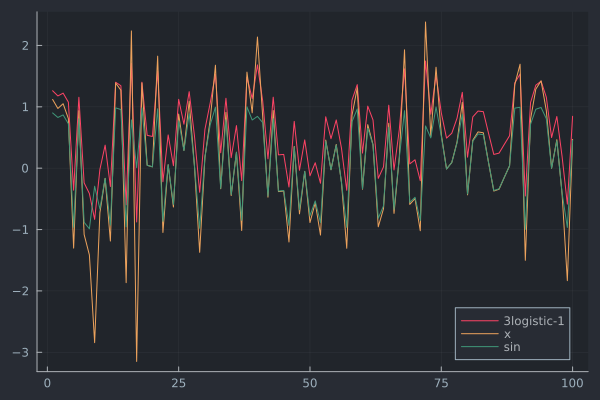

In [27]:
# direct solution with broadcasting, and small user-defined function
n = 100
# f(x) = 3 * StatsFuns.logistic(x) - 1
f(x) = 3 * logistic(x) - 1

x = randn(n)
plot(f.(x), label="3logistic-1")
plot!(x, label="x") # layer on the same plot
plot!(sin.(x), label = "sin")